In [170]:
import pandas as pd
import numpy as np
import math
from itertools import cycle
import statistics

#from datetime import datetime
import datetime

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import style
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import shap

from scipy.stats import randint
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
import scikitplot as skplt
import sklearn as sk
from sklearn import linear_model

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer, PowerTransformer, OneHotEncoder
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import lightgbm as ltb
import xgboost as xgb

import statsmodels.api as sm
import statsmodels
from statsmodels.tools import eval_measures

from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from fredapi import Fred
import pandas_datareader as pdr

import warnings

In [171]:
sk.set_config(display='diagram')
warnings.filterwarnings("ignore")
shap.initjs()

# Plotting using Seaborn
sns.set(style="whitegrid")
style.use("seaborn-white")

In [172]:
fred = Fred(api_key='c0a3f23bdd23a65e6546b6d0e5f4d4a5')

In [173]:
from common.load_features import get_recession, add_recession_feature, get_fed_chair, add_fed_chair
from common.load_data import load_taylor,load_taylor2, load_taylor1a,load_misery, time_split
from common.calc_metrics import model_results

# Setup

## variables

In [174]:
rand_int = 12

#  Set start date
start_date = datetime.date(1940, 1, 1)
start_date_str = datetime.datetime.strftime(start_date, "%Y-%m-%d")

#  Federal Reserve Economic Data Service
data_source = 'fred'

# Functions

In [175]:
t0_df = load_taylor()
train0_df, test0_df = time_split(t0_df)

model_stats_df = model_results('ffef_tr_test', train0_df['FEDFUNDS'], train0_df['ffef_tr'], train0_df.shape[0], 2  , None )
model_stats_df = model_results('ffef_tr_test', test0_df['FEDFUNDS'], test0_df['ffef_tr'], test0_df.shape[0], 2  , model_stats_df )

model_stats_df = model_results('ffef_tr2_test', train0_df['FEDFUNDS'], train0_df['ffef_tr2'], train0_df.shape[0], 2  , model_stats_df )
model_stats_df = model_results('ffef_tr2_test', test0_df['FEDFUNDS'], test0_df['ffef_tr2'], test0_df.shape[0], 2  , model_stats_df )

model_stats_df = model_results('Naive_test', train0_df['FEDFUNDS'], train0_df['FEDFUNDS-1'], train0_df.shape[0], 1  , model_stats_df )
model_stats_df = model_results('Naive_test', test0_df['FEDFUNDS'], test0_df['FEDFUNDS-1'], test0_df.shape[0], 1  , model_stats_df )

model_stats_df

t1_df: (1006, 4)
gdpc1_df: (305, 2)
gdppot_df: (304, 2)
gdpdef_df: (302, 2)
holston_df: (250, 4)
train_df:  (200, 18)
test_df:  (50, 18)


,name,r_sq,adj_r_sq,mse,rmse
0,ffef_tr_test,-0.9567,-0.9666,22.8365,4.7788
1,ffef_tr_test,-39.0258,-39.8596,54.7667,7.4005
2,ffef_tr2_test,0.4458,0.4430,6.4680,2.5432
3,ffef_tr2_test,-13.4214,-13.7219,19.7326,4.4421
4,Naive_test,0.9206,0.9206,0.9263,0.9624
5,Naive_test,0.8830,0.8830,0.1601,0.4002


# Explore

In [176]:
t_df = load_taylor()
m_df = load_misery()
chair_df = get_fed_chair()

t1_df: (1006, 4)
gdpc1_df: (305, 2)
gdppot_df: (304, 2)
gdpdef_df: (302, 2)
holston_df: (250, 4)
t_df: (832, 3)
u_df: (909, 1)
misery_df: (831, 5)


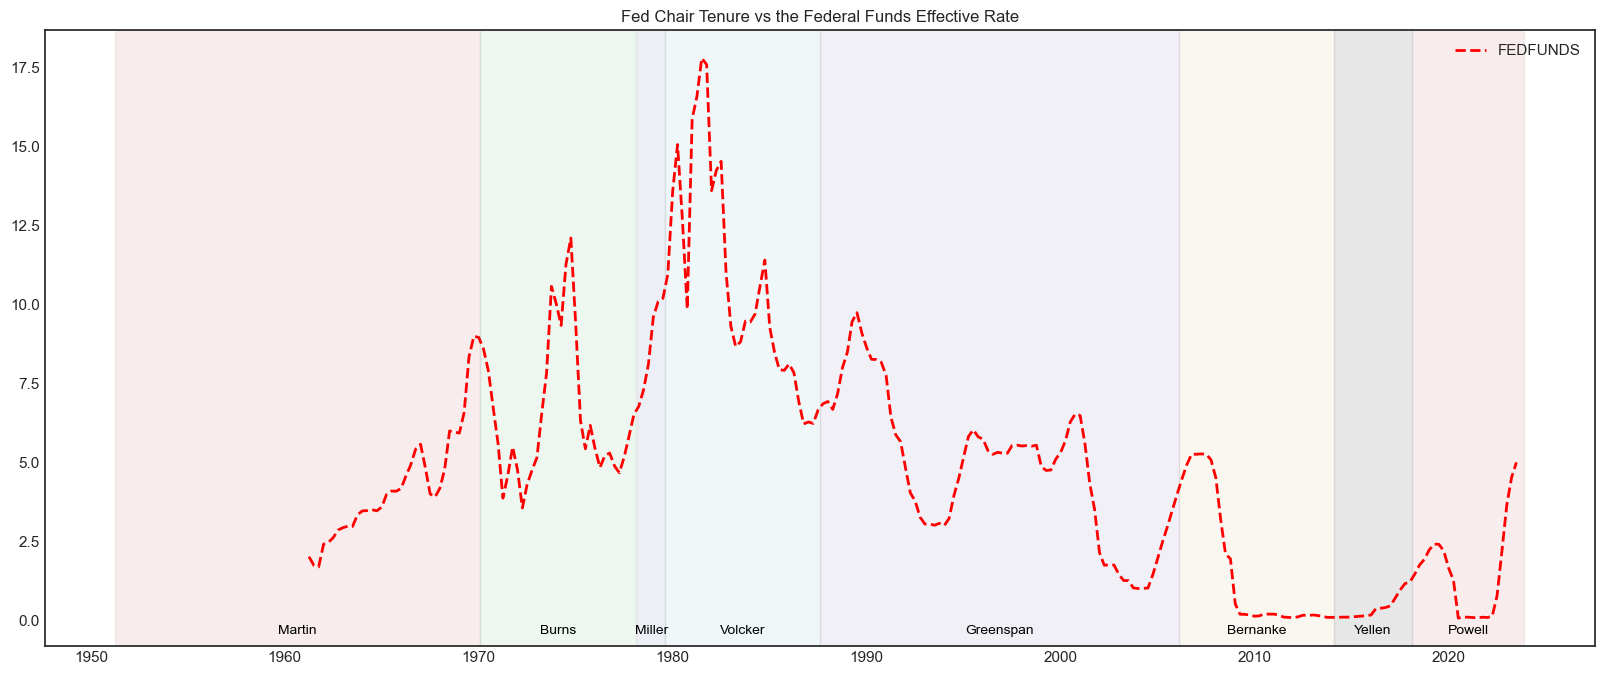

In [240]:
cycol = cycle('rgbcmyk')
min_value = m_df[['FEDFUNDS','m_index']].values.min()-0.5


# Graph
fig, ax = plt.subplots(figsize=(20,8))
ax.xaxis.grid(False)

# Plot
ax.plot(t_df.index, t_df['FEDFUNDS'], color='red', linestyle='--',linewidth=2)
#ax.plot(m_df.index, m_df['m_index'], linestyle='--', color='gray',linewidth=1.5) 
    
# Plotting Chair Tenure
for i,row in chair_df.query('End_Date >= "1960-01-01"').iterrows():
    plt.axvspan(row['Start_Date'], row['End_Date'], facecolor=next(cycol), edgecolor='gray', alpha=0.1, label=row['Name'])
    midpoint = row['Start_Date'] + (row['End_Date'] - row['Start_Date']) / 2
    plt.text(midpoint, min_value, row['Name'],fontsize=10, color='black', ha='center')
    
    
ax.legend(["FEDFUNDS"])
#plt.legend()
plt.grid(False)
ax.set(title='Fed Chair Tenure vs the Federal Funds Effective Rate');
plt.show()

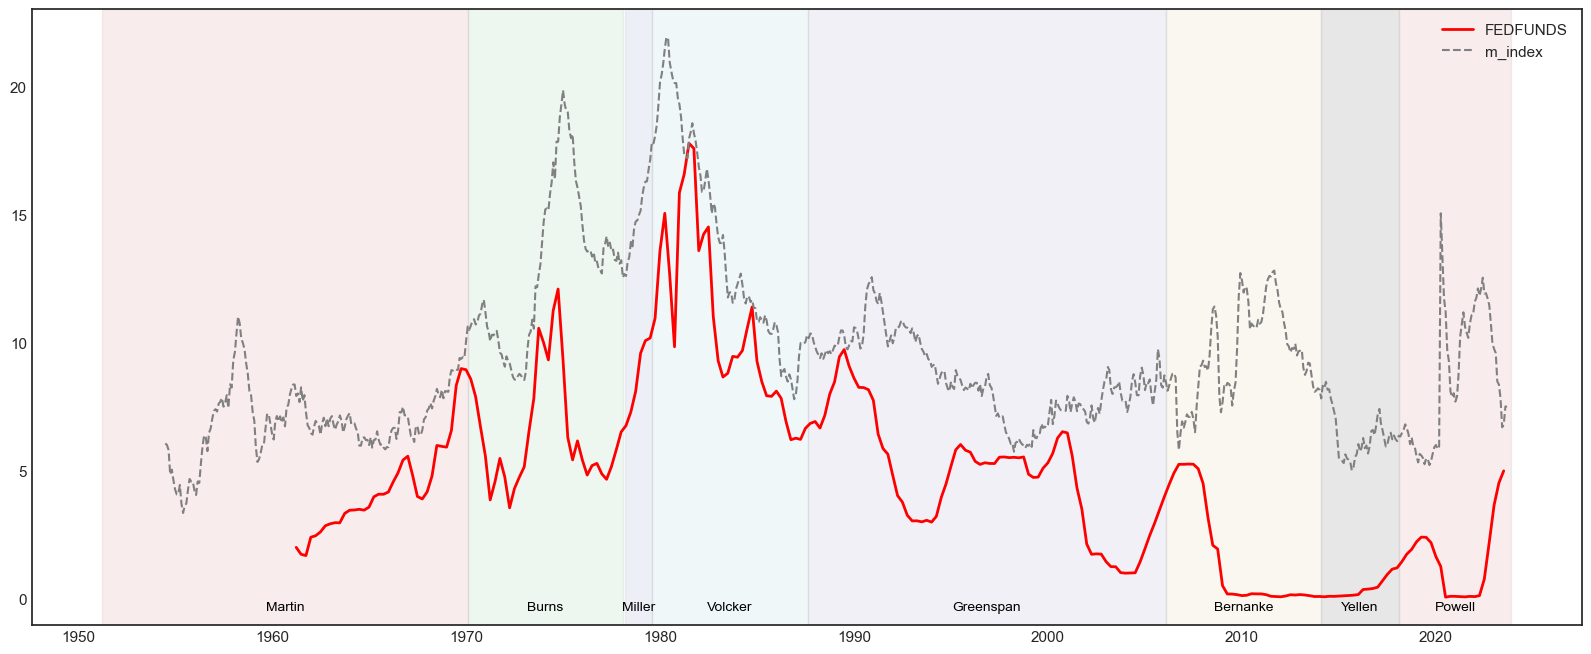

In [177]:
cycol = cycle('rgbcmyk')
min_value = m_df[['FEDFUNDS','m_index']].values.min()-0.5


# Graph
fig, ax = plt.subplots(figsize=(20,8))
ax.xaxis.grid()

# Plot
ax.plot(t_df.index, t_df['FEDFUNDS'], color='red',linewidth=2)
ax.plot(m_df.index, m_df['m_index'], linestyle='--', color='gray',linewidth=1.5) 
    
# Plotting Chair Tenure
for i,row in chair_df.query('End_Date >= "1960-01-01"').iterrows():
    plt.axvspan(row['Start_Date'], row['End_Date'], facecolor=next(cycol), edgecolor='gray', alpha=0.1, label=row['Name'])
    midpoint = row['Start_Date'] + (row['End_Date'] - row['Start_Date']) / 2
    plt.text(midpoint, min_value, row['Name'],fontsize=10, color='black', ha='center')
    
    
ax.legend(["FEDFUNDS","m_index"])
#plt.legend()
plt.grid(False)
plt.show()

In [237]:
t_df[['FEDFUNDS','UNRATE','GDPDEF_PC1','gap_inf','gap_gdp','gap_ue','chair_name','Real_Interest_Rate','chair_index']].groupby('chair_name').mean().round(2).sort_values(by='chair_index')

,FEDFUNDS,UNRATE,GDPDEF_PC1,gap_inf,gap_gdp,gap_ue,Real_Interest_Rate,chair_index
chair_name,,,,,,,,
Martin,4.29,4.69,2.41,0.41,8.93,0.31,4.94,8.0
Burns,6.49,6.28,6.26,4.26,6.53,-1.28,3.80,9.0
Miller,8.66,5.97,7.33,5.33,8.62,-0.97,3.62,10.0
Volcker,10.69,7.75,5.35,3.35,4.49,-2.75,3.53,11.0
Greenspan,4.82,5.54,2.43,0.43,6.86,-0.54,3.06,12.0
Bernanke,1.57,7.29,1.90,-0.10,5.00,-2.29,1.31,13.0
Yellen,0.40,5.17,1.35,-0.65,5.80,-0.17,0.66,14.0
Powell,1.55,4.81,3.48,1.48,7.32,0.19,0.94,15.0


In [179]:
m_df.reset_index(inplace=True)

m_df['chair_name'] = None
m_df['chair_index'] = 0
for i, row in chair_df.iterrows():
    m_df['chair_name'] = m_df['chair_name'].where((m_df['DATE'] < row['Start_Date']) | (m_df['DATE'] > row['End_Date']), row['Name'] )
    m_df['chair_index'] = m_df['chair_index'].where((m_df['DATE'] < row['Start_Date']) | (m_df['DATE'] > row['End_Date']), i )

m_df.set_index('DATE',inplace=True)

In [180]:
df = m_df[['FEDFUNDS','UNRATE','CPIAUCSL_PC1','m_index','chair_name']].groupby('chair_name').mean().round(2).sort_values(by='m_index', ascending=False)
df

,FEDFUNDS,UNRATE,CPIAUCSL_PC1,m_index
chair_name,,,,
Miller,9.24,5.89,9.23,15.12
Volcker,10.61,7.75,6.17,13.93
Burns,6.47,6.31,6.52,12.82
Bernanke,1.53,7.31,2.22,9.52
Greenspan,4.80,5.53,3.09,8.62
Powell,1.72,4.78,3.79,8.57
Martin,3.57,4.88,2.05,6.93
Yellen,0.46,5.06,1.32,6.38


# Models

## Load Data

In [181]:
taylor_df = load_taylor()
train_df, test_df = time_split(taylor_df)

t1_df: (1006, 4)
gdpc1_df: (305, 2)
gdppot_df: (304, 2)
gdpdef_df: (302, 2)
holston_df: (250, 4)
train_df:  (200, 18)
test_df:  (50, 18)


In [182]:
taylor_df['chair_name'].unique()

array(['Martin', 'Burns', 'Miller', 'Volcker', 'Greenspan', 'Bernanke',
       'Yellen', 'Powell'], dtype=object)

In [183]:
X_train = train_df[['FEDFUNDS-1', 'gap_inf', 'gap_ue','recession_flag','chair_name']]
y_train = train_df['FEDFUNDS']


X_test = test_df[['FEDFUNDS-1', 'gap_inf', 'gap_ue','recession_flag','chair_name']]
y_test = test_df['FEDFUNDS']

In [184]:
# Initialize Imputer
imp_num = SimpleImputer(missing_values=np.nan, strategy='mean')

# Initialize Transformer / OneHotEncoder
cat_columns_lst = ['recession_flag','chair_name']
num_columns_lst = ['FEDFUNDS-1', 'gap_inf', 'gap_ue']


ohe_categories = list()
for c in cat_columns_lst:
    ohe_categories.append(list(X_train[c].unique()))
    
ohe = OneHotEncoder(categories=ohe_categories, drop='first',
                   sparse_output=False, handle_unknown='ignore')

transformer = make_column_transformer((ohe, cat_columns_lst), remainder='drop')


numeric_transformer = Pipeline(steps = [('imp_num',imp_num)])
categorical_transformer = Pipeline( steps=[('transformer',transformer)])


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_columns_lst),
        ("cat", categorical_transformer, cat_columns_lst),
    ]
)

In [185]:
t_fit = preprocessor.fit(X_train)
t_fit.get_feature_names_out()
X_train_trf = t_fit.transform(X_train)

#X_train_trf.columns = 
X_train_trf = pd.DataFrame(X_train_trf)
X_train_trf.columns = t_fit.get_feature_names_out()
X_train_trf['DATE'] = y_train.index
X_train_trf.set_index('DATE', inplace=True)

print('X_train_trf: ', X_train_trf.shape)

X_train_trf:  (200, 9)


In [186]:
X_test_trf = t_fit.transform(X_test)

X_test_trf = pd.DataFrame(X_test_trf)
X_test_trf.columns = t_fit.get_feature_names_out()
X_test_trf['DATE'] = y_test.index
X_test_trf.set_index('DATE', inplace=True)

print('X_test_trf: ', X_test_trf.shape)

X_test_trf:  (50, 9)


In [187]:
X_test_trf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50 entries, 2011-03-31 to 2023-06-30
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   num__FEDFUNDS-1                           50 non-null     float64
 1   num__gap_inf                              50 non-null     float64
 2   num__gap_ue                               50 non-null     float64
 3   cat__onehotencoder__recession_flag_True   50 non-null     float64
 4   cat__onehotencoder__chair_name_Burns      50 non-null     float64
 5   cat__onehotencoder__chair_name_Miller     50 non-null     float64
 6   cat__onehotencoder__chair_name_Volcker    50 non-null     float64
 7   cat__onehotencoder__chair_name_Greenspan  50 non-null     float64
 8   cat__onehotencoder__chair_name_Bernanke   50 non-null     float64
dtypes: float64(9)
memory usage: 3.9 KB


## Stats Model - Taylor Index

In [188]:
X_train_const = sm.add_constant(X_train_trf)
print('X_train_const: ', X_train_const.shape)

X_train_const:  (200, 10)


In [189]:
ols_model = sm.OLS(y_train, X_train_const)
ols_result = ols_model.fit()

ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               FEDFUNDS   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     328.3
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.03e-110
Time:                        22:00:51   Log-Likelihood:                -248.86
No. Observations:                 200   AIC:                             517.7
Df Residuals:                     190   BIC:                             550.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.7363      0.207      3.560      0.000       0.328       1.144
num__FEDFUNDS-1                              0.8296      0.041     20.120      0.000       0.748       0.911
num__gap_inf                                 0.2242      0.054      4.140      0.000       0.117       0.331
num__gap_ue                                  0.2513      0.053      4.773      0.000       0.147       0.355
cat__onehotencoder__recession_flag_True     -0.7219      0.211     -3.414      0.001      -1.139      -0.305
cat__onehotencoder__chair_name_Burns        -0.1466      0.275     -0.534      0.594      -0.689       0.395
cat__onehotencoder__chair_name_Miller        0.2950      0.436      0.677      0.499      -0.565       1.155
cat__onehotencoder__chair_name_Volcker       1.0913      0.356      3.067      0.002       0.389       1.793
cat__onehotencoder__chair_name_Greenspan     0.1426      0.185      0.770      0.442      -0.223       0.508
cat__onehotencoder__chair_name_Bernanke      0.2085      0.273      0.763      0.446      -0.330       0.747
==============================================================================
Omnibus:                       40.051   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              422.309
Skew:                           0.219   Prob(JB):                     1.98e-92
Kurtosis:                      10.105   Cond. No.                         62.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [190]:
train_pred = ols_result.predict(X_train_const)

t = ols_result.get_prediction(X_train_const)
train_pred_ols = t.summary_frame(alpha=0.05)

In [191]:
model_stats_df = model_results('ols_train', y_train, train_pred_ols['mean'], X_train.shape[0], 2 , model_stats_df )

### Test

In [192]:
X_test_const = sm.add_constant(X_test_trf)
print('X_test_const: ', X_test_const.shape)

X_test_const:  (50, 10)


In [193]:
t = ols_result.get_prediction(X_test_const)
test_pred_ols = t.summary_frame(alpha=0.05)
test_pred_ols.shape

(50, 6)

In [194]:
model_stats_df = model_results('ols_test', y_test, test_pred_ols['mean'], X_test.shape[0], 2 , model_stats_df )

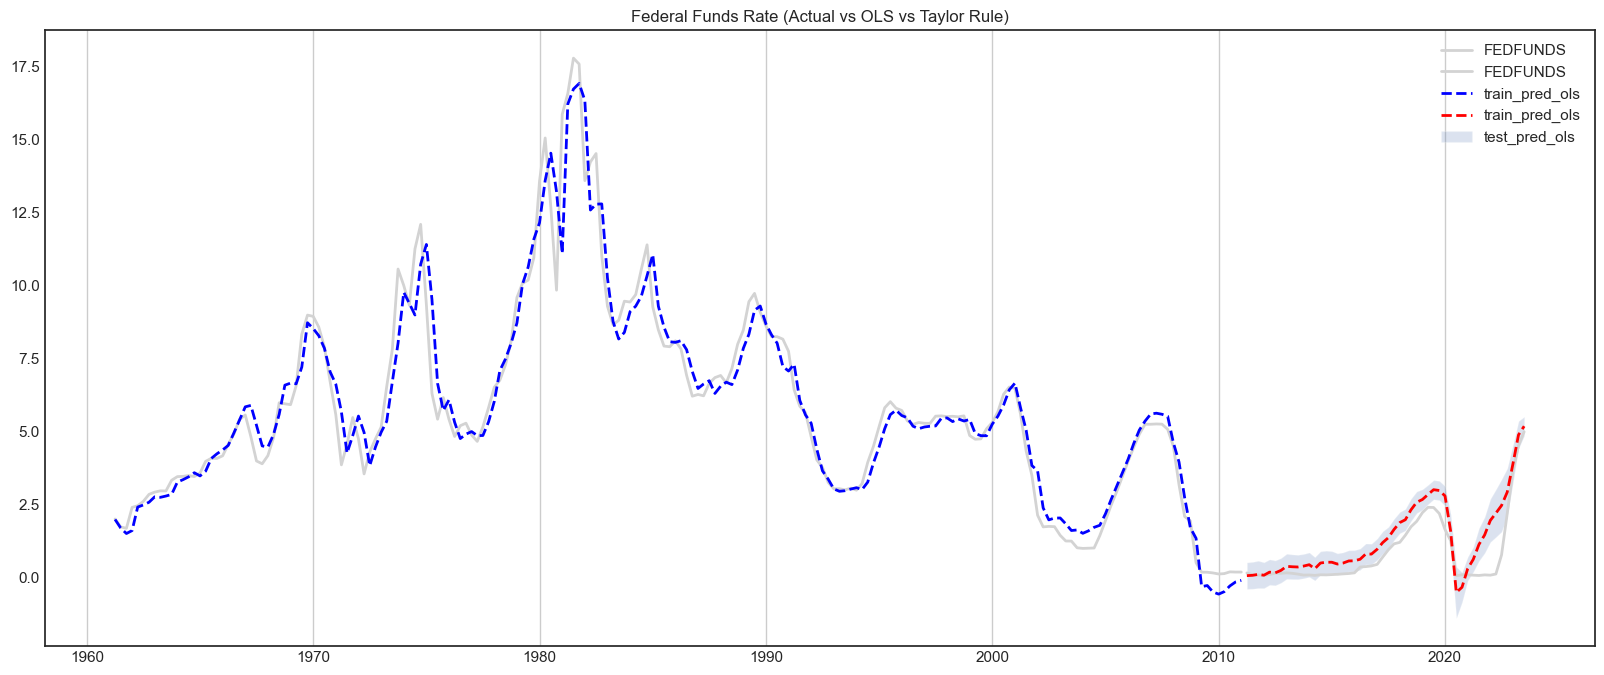

In [195]:
# Graph
fig, ax = plt.subplots(figsize=(20,8))
ax.xaxis.grid()

# Plot
ax.plot(train_df.index, train_df['FEDFUNDS'], 'lightgray', linewidth=2)
ax.plot(test_df.index, test_df['FEDFUNDS'], 'lightgray', linewidth=2)
ax.plot(train_pred_ols.index, train_pred_ols['mean'], color='blue', linestyle='--', linewidth=2)
ax.plot(test_pred_ols.index, test_pred_ols['mean'], color='red', linestyle='--', linewidth=2)
ax.fill_between(test_pred_ols.index, test_pred_ols['mean_ci_lower'], test_pred_ols['mean_ci_upper'], alpha=0.20)
#ax.fill_between(test_pred_ols.index, test_pred_ols['obs_ci_lower'], test_pred_ols['obs_ci_upper'], alpha=0.15)

#ax.plot(taylor_df.index, taylor_df['ffef_tr'], 'orange', linestyle='--', linewidth=1)

ax.legend(["FEDFUNDS", "FEDFUNDS","train_pred_ols","train_pred_ols",'test_pred_ols',"ffef_tr"])
ax.set(title='Federal Funds Rate (Actual vs OLS vs Taylor Rule)');

# Lasso

In [196]:
# Lasso with 5 fold cross-validation
model = linear_model.LassoCV(cv=5, random_state=rand_int, max_iter=10000)

# Fit model
model.fit(X_train_trf, y_train)

print('model.alpha_: ', model.alpha_)

model.alpha_:  0.03178225849813304


In [197]:
lasso_best = linear_model.Lasso(alpha=model.alpha_)
lasso_best.fit(X_train_trf, y_train)

train_pred_lasso = lasso_best.predict(X_train_trf)

In [198]:
feature_df = pd.DataFrame(lasso_best.coef_, t_fit.get_feature_names_out())
feature_df.columns = ['coef']
feature_df.sort_values(by=['coef'], key=pd.Series.abs , ascending=False , inplace=True)
feature_df

,coef
num__FEDFUNDS-1,0.890488
cat__onehotencoder__recession_flag_True,-0.473329
cat__onehotencoder__chair_name_Volcker,0.362840
num__gap_ue,0.160058
num__gap_inf,0.147884
cat__onehotencoder__chair_name_Burns,-0.024281
cat__onehotencoder__chair_name_Miller,0.000000
cat__onehotencoder__chair_name_Greenspan,-0.000000
cat__onehotencoder__chair_name_Bernanke,-0.000000


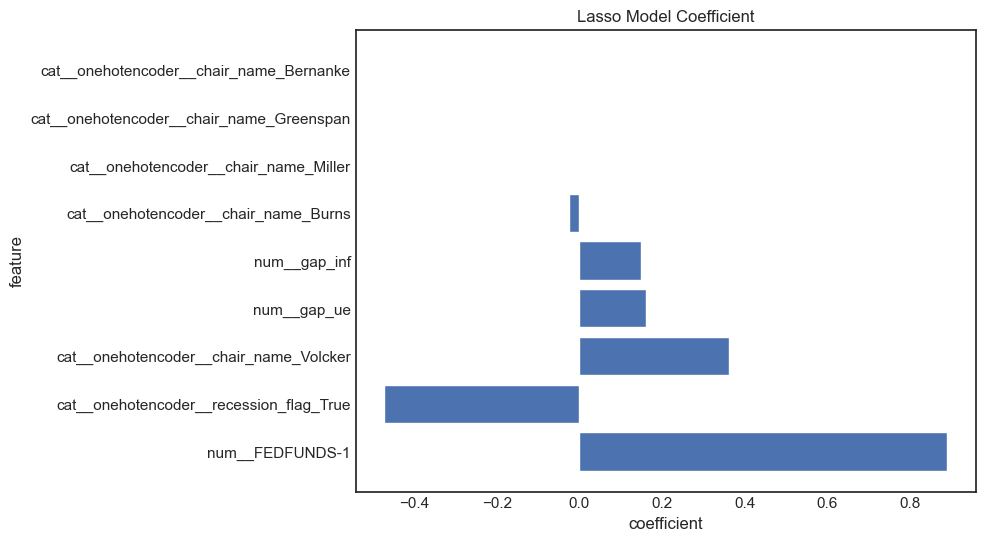

In [199]:
# Plot the MSE values against alphas
plt.figure(figsize=(8, 6))
plt.barh(feature_df.index, feature_df['coef'])

#plt.legend()
plt.xlabel('coefficient')
plt.ylabel('feature')
plt.title('Lasso Model Coefficient')
plt.grid(False)
plt.show()

In [200]:
model_stats_df = model_results('lasso_train', y_train, train_pred_lasso, X_train.shape[0], 2 , model_stats_df )

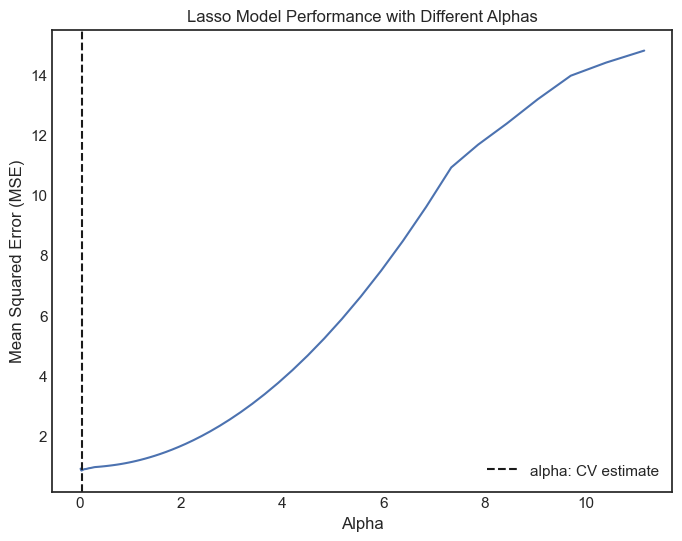

In [201]:
mse_values = np.mean(model.mse_path_, axis=1)

# Plot the MSE values against alphas
plt.figure(figsize=(8, 6))
plt.plot(model.alphas_, mse_values)

plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Lasso Model Performance with Different Alphas')
plt.grid(False)
plt.show()

(-0.5462506883166667,
 11.716770381983334,
 -1.3394562643101218,
 30.89033346298302)

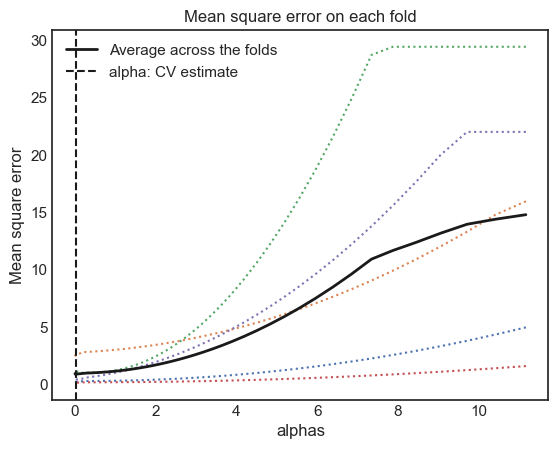

In [202]:
#plt.semilogx(model.alphas_, model.mse_path_, ":")
plt.plot(model.alphas_, model.mse_path_, ":")
plt.plot(
    model.alphas_ ,
    model.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

#ymin, ymax = 50000, 250000
#plt.ylim(ymin, ymax);

In [203]:
test_pred_lasso = lasso_best.predict(X_test_trf)
print('test_pred_lasso: ', test_pred_lasso.shape)

test_pred_lasso:  (50,)


In [204]:
model_stats_df = model_results('lasso_test', y_test, test_pred_lasso, X_test_trf.shape[0], X_test_trf.shape[1] , model_stats_df )

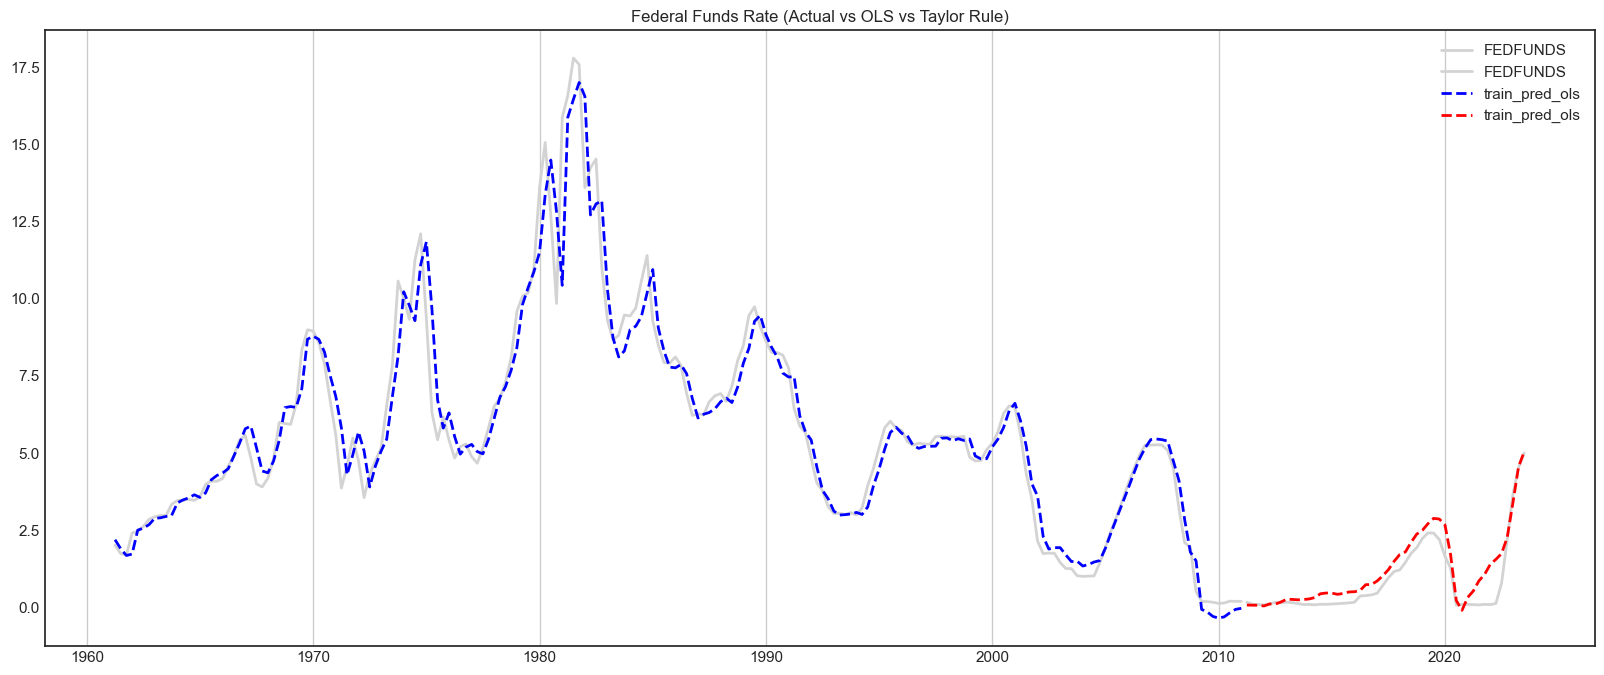

In [205]:
# Graph
fig, ax = plt.subplots(figsize=(20,8))
ax.xaxis.grid()

# Plot
ax.plot(train_df.index, train_df['FEDFUNDS'], 'lightgray', linewidth=2)
ax.plot(test_df.index, test_df['FEDFUNDS'], 'lightgray', linewidth=2)
ax.plot(train_pred_ols.index, train_pred_lasso, color='blue', linestyle='--', linewidth=2)
ax.plot(test_pred_ols.index, test_pred_lasso, color='red', linestyle='--', linewidth=2)

ax.legend(["FEDFUNDS", "FEDFUNDS","train_pred_ols","train_pred_ols",'test_pred_ols',"ffef_tr"])
ax.set(title='Federal Funds Rate (Actual vs OLS vs Taylor Rule)');

# LGBM

In [206]:
ltb_model = ltb.LGBMRegressor(verbose=-1).fit(X_train_trf, y_train)
train_pred_lgbm = ltb_model.predict(X_train_trf, pred_contrib=False, raw_score=False)

<Axes: >

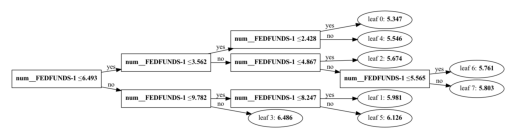

In [207]:
ltb.plot_tree(ltb_model)

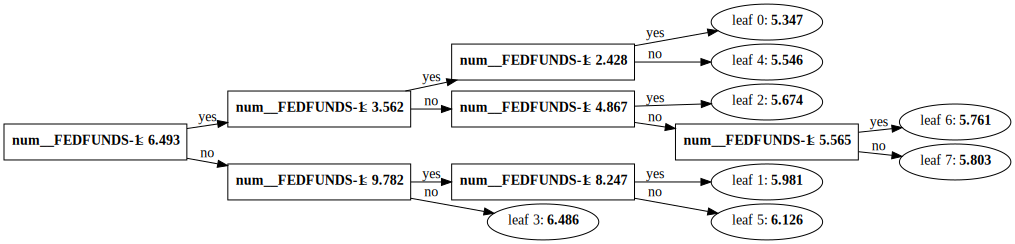

In [208]:
ltb.create_tree_digraph(ltb_model)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

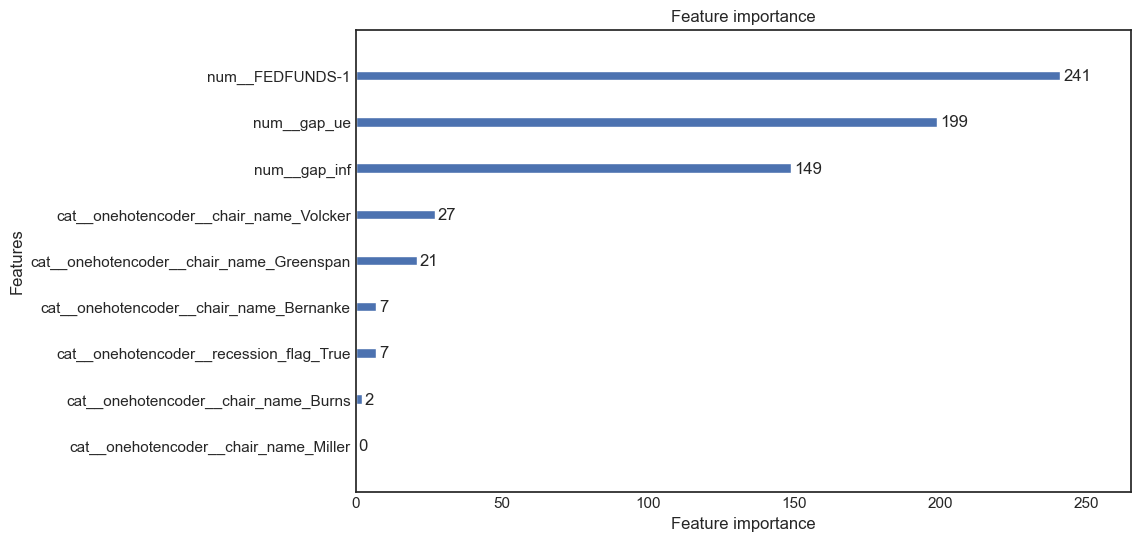

In [209]:
ltb.plot_importance(ltb_model, ignore_zero=False, grid=False, figsize=(10,6))

In [210]:
model_stats_df = model_results('lgbm_train', y_train, train_pred_lgbm, X_train.shape[0], 2  , model_stats_df )

## Test

In [211]:
test_pred_lgbm = ltb_model.predict(X_test_trf, pred_contrib=False, raw_score=False)
test_pred_lgbm.shape

(50,)

In [212]:
model_stats_df = model_results('lgbm_test', y_test, test_pred_lgbm, X_train.shape[0], 2 , model_stats_df )

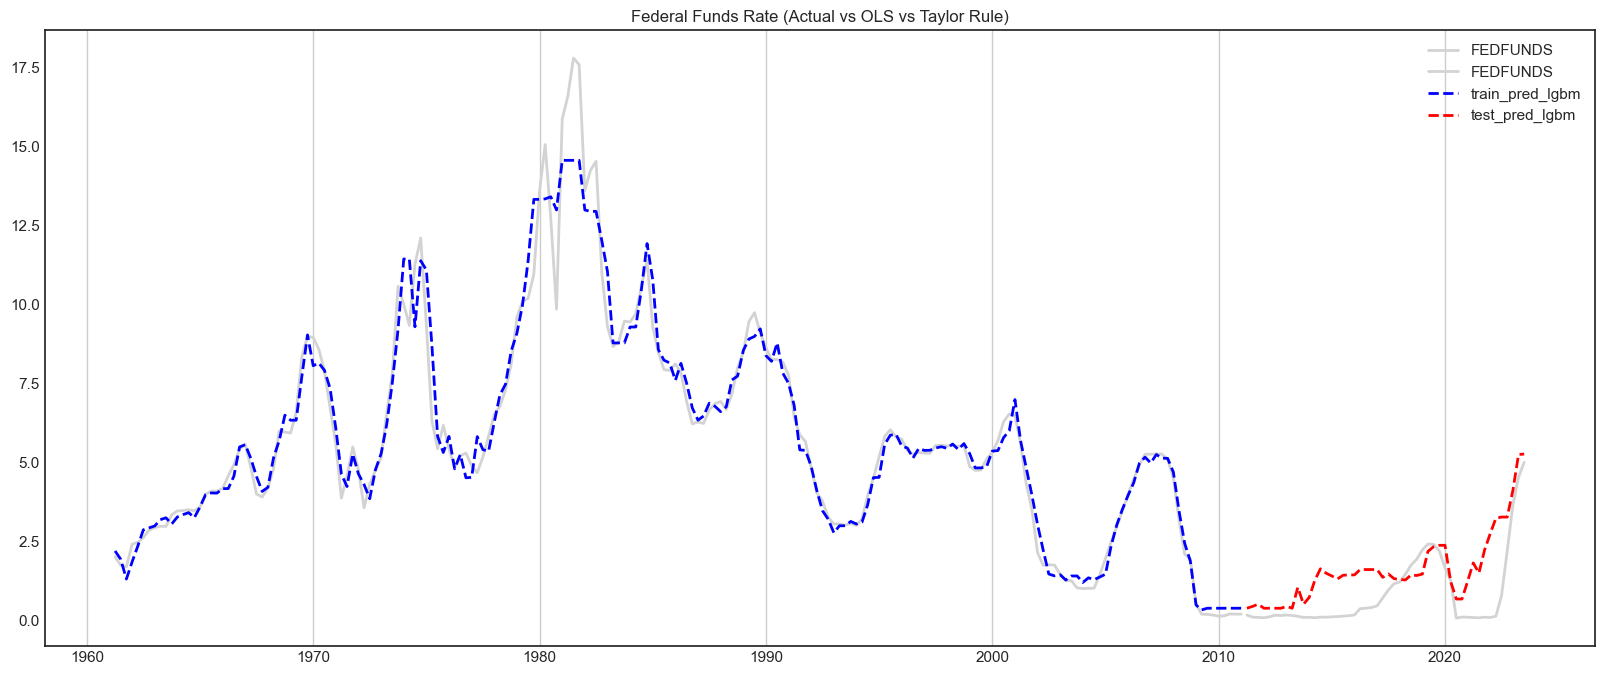

In [213]:
# Graph
fig, ax = plt.subplots(figsize=(20,8))
ax.xaxis.grid()

# Plot
ax.plot(train_df.index, train_df['FEDFUNDS'], 'lightgray', linewidth=2)
ax.plot(test_df.index, test_df['FEDFUNDS'], 'lightgray', linewidth=2)
ax.plot(X_train.index, train_pred_lgbm, color='blue', linestyle='--', linewidth=2)
ax.plot(X_test.index, test_pred_lgbm, color='red', linestyle='--', linewidth=2)
#ax.fill_between(test_pred_ols.index, test_pred_ols['mean_ci_lower'], test_pred_ols['mean_ci_upper'], alpha=0.20)
#ax.fill_between(test_pred_ols.index, test_pred_ols['obs_ci_lower'], test_pred_ols['obs_ci_upper'], alpha=0.15)

#ax.plot(taylor_df.index, taylor_df['ffef_tr'], 'orange', linestyle='--', linewidth=1)

ax.legend(["FEDFUNDS", "FEDFUNDS","train_pred_lgbm","test_pred_lgbm"])
ax.set(title='Federal Funds Rate (Actual vs OLS vs Taylor Rule)');

# XGB

In [214]:
xgb_model = xgb.XGBRegressor(verbose=-1).fit(X_train_trf, y_train)
train_pred_xgb = xgb_model.predict(X_train_trf)
xgb_model.score(X_train_trf, y_train)

0.9999990908768928

In [215]:
model_stats_df = model_results('xgb_train', y_train, train_pred_xgb, X_train.shape[0], 2 , model_stats_df )

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

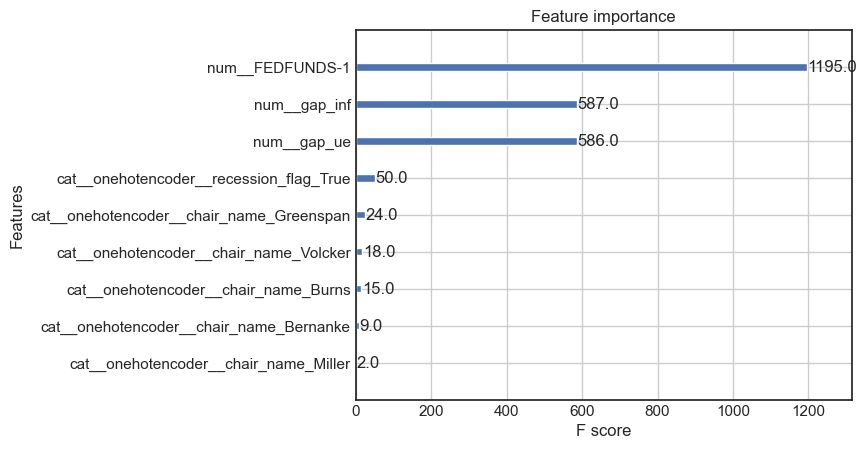

In [216]:
xgb.plot_importance(xgb_model)

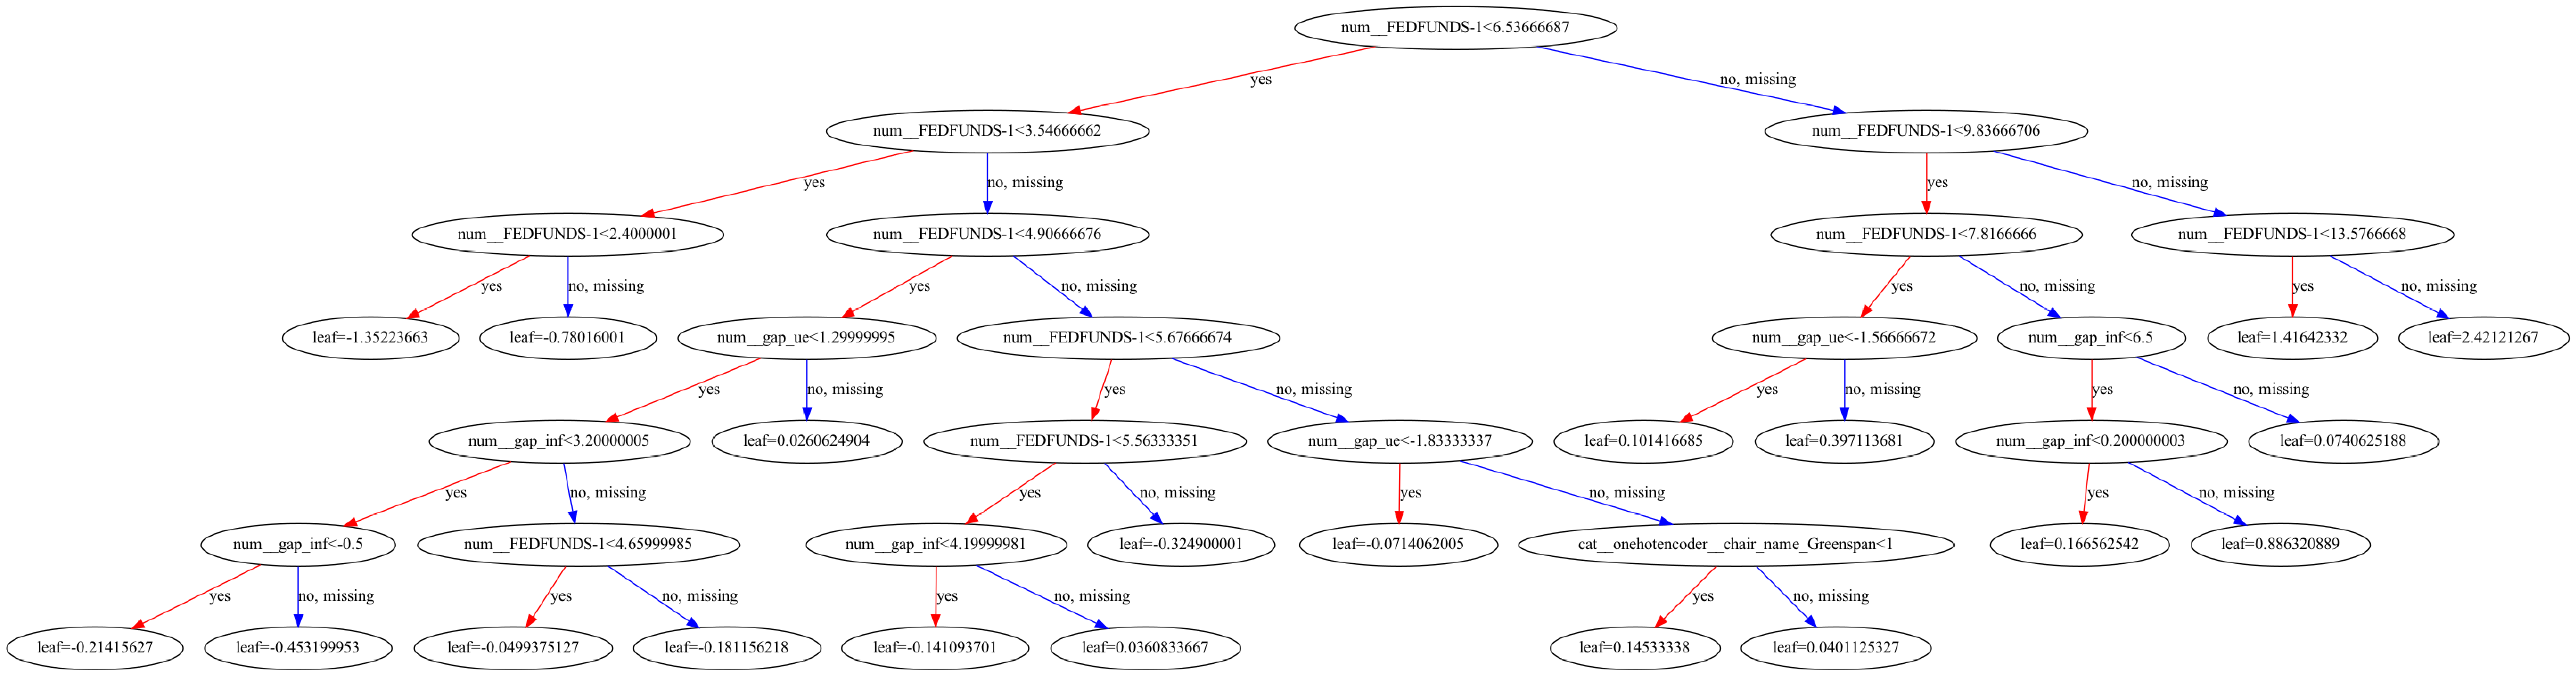

In [217]:
fig, ax = plt.subplots(figsize=(25,10))
#plt.figure(figsize=(12,12))
#xgb.plot_tree(xgb_model, ax=ax)
xgb.plot_tree(xgb_model, ax=ax,fontsize=10)

fig.set_size_inches(150, 100)
fig.savefig('tree.png')

fig.show()

## Test

In [218]:
test_pred_xgb = xgb_model.predict(X_test_trf)
test_pred_xgb.shape

(50,)

In [219]:
model_stats_df = model_results('xgb_test', y_test, test_pred_xgb, X_train.shape[0], 2 , model_stats_df )

# AdaBoostRegressor

In [220]:
ada_model = AdaBoostRegressor().fit(X_train_trf, y_train)
train_pred_ada = ada_model.predict(X_train_trf)

model_stats_df = model_results('ada_test', y_train, train_pred_ada, X_train_trf.shape[0], 2 , model_stats_df )

In [221]:
test_pred_ada = ada_model.predict(X_test_trf)
model_stats_df = model_results('ada_test', y_test, test_pred_ada, X_train_trf.shape[0], 2 , model_stats_df )

# tsa.SARIMAX

In [222]:
model = sm.tsa.SARIMAX(y_train, exog=X_train_trf)
result_model = model.fit(disp=False)

result_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               FEDFUNDS   No. Observations:                  200
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -253.021
Date:                Wed, 22 Nov 2023   AIC                            528.043
Time:                        22:01:00   BIC                            564.324
Sample:                    03-31-1961   HQIC                           542.725
                         - 12-31-2010                                         
Covariance Type:                  opg                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
num__FEDFUNDS-1                              0.9002      0.052     17.434      0.000       0.799       1.001
num__gap_inf                                 0.1700      0.055      3.101      0.002       0.063       0.277
num__gap_ue                                  0.2452      0.075      3.252      0.001       0.097       0.393
cat__onehotencoder__recession_flag_True     -0.8061      0.222     -3.638      0.000      -1.240      -0.372
cat__onehotencoder__chair_name_Burns         0.3717      0.344      1.079      0.281      -0.303       1.047
cat__onehotencoder__chair_name_Miller        0.7113      0.874      0.814      0.416      -1.001       2.424
cat__onehotencoder__chair_name_Volcker       1.2464      0.562      2.220      0.026       0.146       2.347
cat__onehotencoder__chair_name_Greenspan     0.5639      0.375      1.503      0.133      -0.172       1.299
cat__onehotencoder__chair_name_Bernanke      0.7698      0.452      1.703      0.089      -0.116       1.656
ar.L1                                        0.1727      0.068      2.528      0.011       0.039       0.307
sigma2                                       0.7352      0.052     14.141      0.000       0.633       0.837
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):               922.49
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               0.21   Skew:                             0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [223]:
train_result = result_model.get_prediction(start=-len(X_train_trf), dynamic=True)

In [224]:
train_pred_SARIM = train_result.summary_frame()
train_pred_SARIM

FEDFUNDS,mean,mean_se,mean_ci_lower,mean_ci_upper
1961-03-31,1.473055,0.870492,-0.233079,3.179188
1961-06-30,1.159958,0.870492,-0.546175,2.866092
1961-09-30,0.957126,0.870492,-0.749008,2.663260
1961-12-31,1.051070,0.870492,-0.655063,2.757204
1962-03-31,1.886152,0.870492,0.180018,3.592285
...,...,...,...,...
2009-12-31,-0.604905,0.870492,-2.311038,1.101229
2010-03-31,-0.545396,0.870492,-2.251530,1.160738
2010-06-30,-0.382360,0.870492,-2.088494,1.323774
2010-09-30,-0.253483,0.870492,-1.959617,1.452650


In [225]:
model_stats_df = model_results('SARIMAX_train',train_df['FEDFUNDS'], train_pred_SARIM['mean'], X_train.shape[0],X_train.shape[1] , model_stats_df )

## Test

In [226]:
s_idx = len(X_train_trf)
e_idx = s_idx + len(X_test_trf) - 1

test_result = result_model.get_prediction(start=s_idx, end=e_idx, exog=X_test_trf, dynamic=True)

In [227]:
test_pred_SARIM = test_result.summary_frame()
test_pred_SARIM.shape

(50, 4)

In [228]:
predict_ci = test_result.conf_int(alpha=0.5)
predict_ci.head()

,lower FEDFUNDS,upper FEDFUNDS
2011-03-31,-0.576890,0.579741
2011-06-30,-0.644262,0.529492
2011-09-30,-0.644137,0.530124
2011-12-31,-0.649946,0.524329
2012-03-31,-0.552336,0.621941


In [229]:
model_stats_df = model_results('SARIMAX_test', test_df['FEDFUNDS'], test_pred_SARIM['mean'], X_test.shape[0], X_train.shape[1] , model_stats_df )

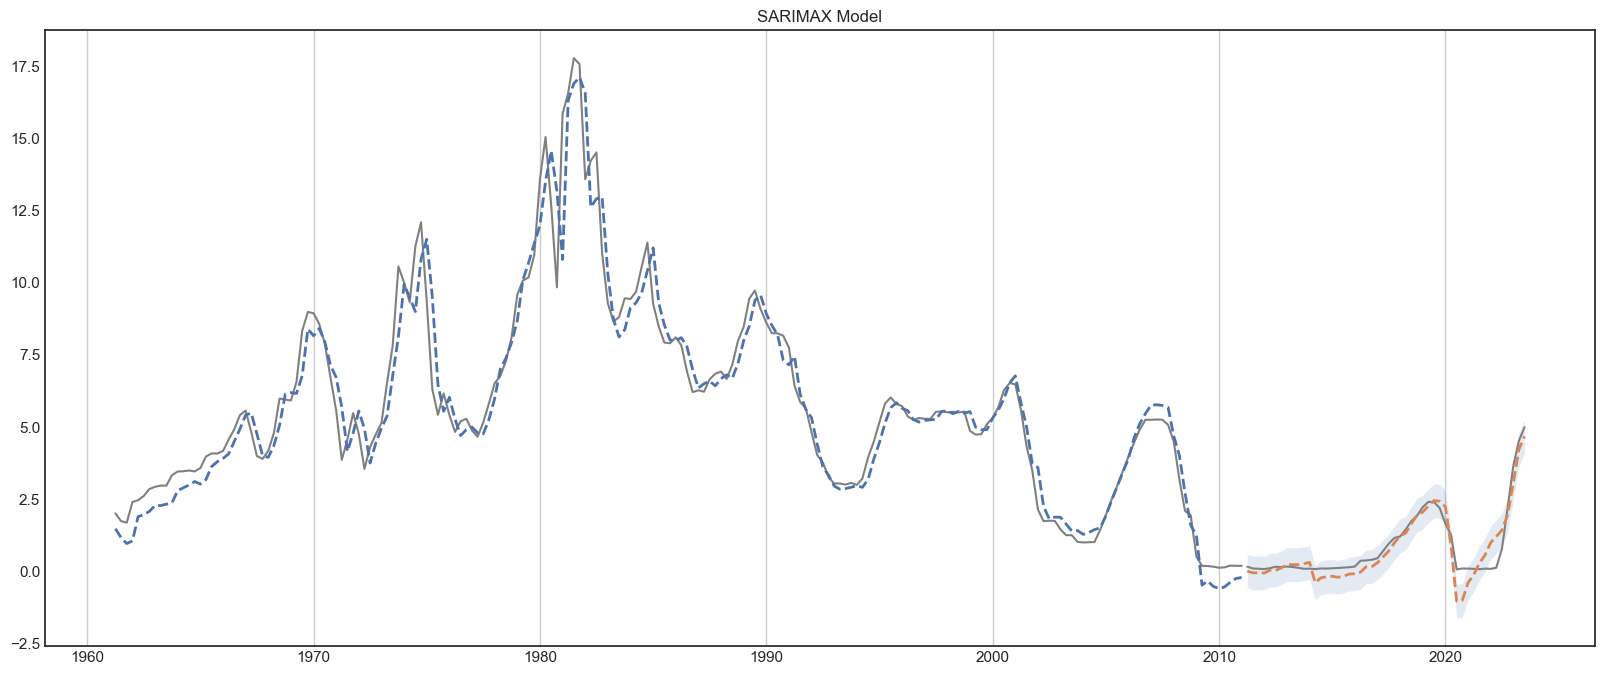

In [230]:
# Graph
fig, ax = plt.subplots(figsize=(20,8))
ax.xaxis.grid()

# Plot
ax.plot(train_df.index, train_df['FEDFUNDS'], 'gray')
ax.plot(test_df.index, test_df['FEDFUNDS'], 'gray')
ax.plot(train_pred_SARIM.index, train_pred_SARIM['mean'], linestyle='--', linewidth=2)
ax.plot(test_pred_SARIM.index, test_pred_SARIM['mean'], linestyle='--', linewidth=2)
ax.fill_between(test_pred_SARIM.index, predict_ci['lower FEDFUNDS'], predict_ci['upper FEDFUNDS'], alpha=0.15)

ax.set(title='SARIMAX Model');

In [231]:
model_stats_df

,name,r_sq,adj_r_sq,mse,rmse
0,ffef_tr_test,-0.9567,-0.9666,22.8365,4.7788
1,ffef_tr_test,-39.0258,-39.8596,54.7667,7.4005
2,ffef_tr2_test,0.4458,0.4430,6.4680,2.5432
3,ffef_tr2_test,-13.4214,-13.7219,19.7326,4.4421
4,Naive_test,0.9206,0.9206,0.9263,0.9624
5,Naive_test,0.8830,0.8830,0.1601,0.4002
6,ols_train,0.9396,0.9393,0.7052,0.8398
7,ols_test,0.6697,0.6628,0.4519,0.6722
8,lasso_train,0.9361,0.9358,0.7453,0.8633
9,lasso_test,0.8390,0.8076,0.2202,0.4693
